%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/chenna/opt/anaconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


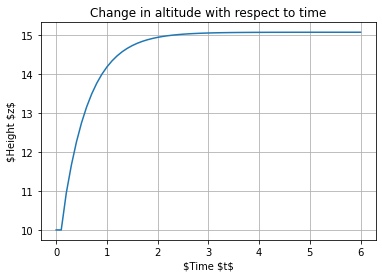

In [2]:
%pylab inline
# Perfect sensor
def sense(x):
    return x
def simulate(Δt, x, u, m=0.8, g=9.8, fb=9):
    # Control input affects the acceleration
    dx = array([x[3], x[4], x[5], u[0]/m, u[1]/m, u[2]/m])
    
    # Include the gravity in the acceleration in z
    dx[5] += - g+fb/m
        
    # Euler integration
    x += Δt * dx
    
    # Simulate the floor (Plastic collision)    
    if x[2] < 0:        
        x[2] = 0  # z = 0
        x[5] = 0  # vz = 0
    
    return x
def control(t, y):    
    ux = 0
    uy = 0
    uz = 15*(15-y[2])+10*(0-y[5])  ### WRITE YOUR CONTROL POLICY HERE TO MAKE THE ROBOT FLY
    return [ux, uy, uz]
tf = 6.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([0., 0., 10., 0.,0.,0.])
x_log = [copy(x)]

for t in time:    
    y = sense(x)
    u = control(t, y)
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)
fig, ax = plt.subplots()
ax.plot(time, x_log[:-1,2])
ax.set(title="Change in altitude with respect to time", xlabel="$Time $t$", ylabel="$Height $z$")
ax.grid()


# axes().set_ylabel("Time z")

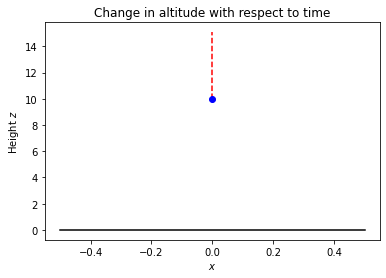

In [3]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    ax.plot(x_log[:,0], x_log[:,2], 'r--')
    
    # Initial conditions
    ax.plot(x_log[t,0], x_log[t,2], 'bo')
    
    # Plot floor
    ax.plot([-0.5,0.5], [0,0], 'k-')
    
    ax.set(title="Change in altitude with respect to time", xlabel="$x$", ylabel="Height $z$")

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())